## Summer School on Deep Learning Surathkal, Karnataka - 2019

**Understanding the Importance of Normalization**
- In this experiment we are demonstrating the importance of normalization by using CIPHAR 10 with LeNet architecture. Normalization is the importance part in building the deep neural netwrk, which helps to make the data centralize (that helps in faster convergence.)
- In the first part of the experiment we performed the exoeriment without normalization and the second part with normalization.

**Imports**

In [0]:
from keras.datasets import cifar10
from matplotlib import pyplot
%matplotlib inline
from scipy.misc import toimage
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


170500096/170498071 [==============================] - 20s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


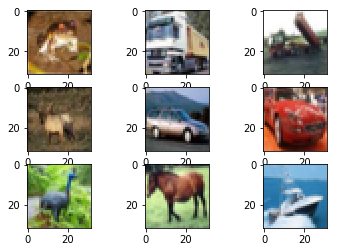

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
pyplot.show()

In [0]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

50000
50000
10000
10000


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**Pre-Processing**

In [0]:
'''X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0'''

"X_train = X_train.astype('float32')\nX_test = X_test.astype('float32')\nX_train = X_train / 255.0\nX_test = X_test / 255.0"

In [0]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
import keras
from keras import layers
from keras import models

**LeNet Model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(32,32,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dens

**Keras Callbacks**

In [0]:
import os
os.chdir("/content/drive/My Drive/SSDL/Day2")
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('Models/Ciphar_LeNet_No_Norm.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('Models/Ciphar_LeNet_No_Norm.csv',append=True)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [0]:
history=model.fit(X_train, y_train, validation_split=(0.2), epochs=15, batch_size=32,verbose=2,callbacks=[cv,mc,tb])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 10s - loss: 1.8493 - acc: 0.3319 - val_loss: 1.6208 - val_acc: 0.4203
Epoch 2/15
 - 6s - loss: 1.5021 - acc: 0.4600 - val_loss: 1.4351 - val_acc: 0.4846
Epoch 3/15
 - 6s - loss: 1.3709 - acc: 0.5118 - val_loss: 1.3719 - val_acc: 0.5104
Epoch 4/15
 - 6s - loss: 1.2817 - acc: 0.5441 - val_loss: 1.3955 - val_acc: 0.5128
Epoch 5/15
 - 6s - loss: 1.2024 - acc: 0.5744 - val_loss: 1.3225 - val_acc: 0.5360
Epoch 6/15
 - 6s - loss: 1.1377 - acc: 0.5949 - val_loss: 1.3397 - val_acc: 0.5319
Epoch 7/15
 - 6s - loss: 1.0766 - acc: 0.6178 - val_loss: 1.3420 - val_acc: 0.5398
Epoch 8/15
 - 6s - loss: 1.0213 - acc: 0.6380 - val_loss: 1.4192 - val_acc: 0.5212
Epoch 9/15
 - 6s - loss: 0.9737 - acc: 0.6519 - val_loss: 1.3733 - val_acc: 0.5500
Epoch 10/15
 - 7s - loss: 0.9325 - acc: 0.6684 - val_loss: 1.4329 - val_acc: 0.5358
Epoch 11/15
 - 7s - loss: 0.8825 - acc: 0.6855 - val_loss: 1.4757 - va

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.6537869806289673
Test accuracy: 0.5272


**Loss Curves**

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(15)

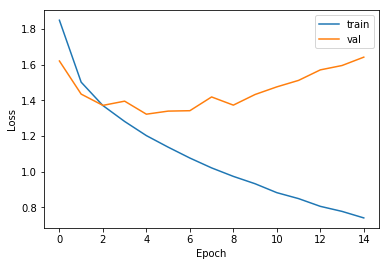

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

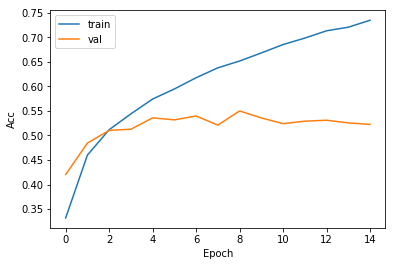

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Normalised Data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


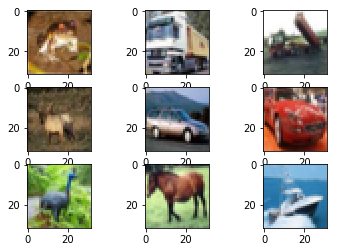

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
pyplot.show()

In [0]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

50000
50000
10000
10000


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
import keras
from keras import layers
from keras import models

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(32,32,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164     
__________

In [0]:
import os
os.chdir("/content/drive/My Drive/SSDL/Day2")
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('/Models and CSV/Ciphar_LeNet_Norm.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/Models and CSV/Ciphar_LeNet_Norm.csv',append=True)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [0]:
history=model.fit(X_train, y_train, validation_split=(0.2), epochs=15, batch_size=32,verbose=2,callbacks=[cv,mc,tb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 6s - loss: 1.7096 - acc: 0.3764 - val_loss: 1.5460 - val_acc: 0.4440
Epoch 2/15
 - 6s - loss: 1.4359 - acc: 0.4834 - val_loss: 1.3927 - val_acc: 0.4944
Epoch 3/15
 - 6s - loss: 1.3224 - acc: 0.5248 - val_loss: 1.3094 - val_acc: 0.5323
Epoch 4/15
 - 6s - loss: 1.2378 - acc: 0.5545 - val_loss: 1.2426 - val_acc: 0.5566
Epoch 5/15
 - 6s - loss: 1.1757 - acc: 0.5776 - val_loss: 1.2033 - val_acc: 0.5751
Epoch 6/15
 - 6s - loss: 1.1232 - acc: 0.6003 - val_loss: 1.2179 - val_acc: 0.5686
Epoch 7/15
 - 7s - loss: 1.0724 - acc: 0.6185 - val_loss: 1.2499 - val_acc: 0.5673
Epoch 8/15
 - 7s - loss: 1.0329 - acc: 0.6338 - val_loss: 1.1640 - val_acc: 0.5990
Epoch 9/15
 - 6s - loss: 0.9923 - acc: 0.6433 - val_loss: 1.1550 - val_acc: 0.5955
Epoch 10/15
 - 6s - loss: 0.9505 - acc: 0.6630 - val_loss: 1.1951 - val_acc: 0.5840
Epoch 11/15
 - 6s - loss: 0.9241 - acc: 0.6710 - val_loss: 1.1581 - val_acc: 0.5996
Epoch 12/15
 - 6s - loss: 0.8858 - 

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.1955584478378296
Test accuracy: 0.5993


In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(15)

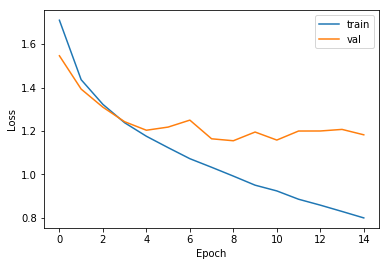

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [1]:
import medpy

ModuleNotFoundError: ignored

In [2]:
!pip install medpy

     |████████████████████████████████| 153kB 3.3MB/s 
     |████████████████████████████████| 42.5MB 1.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/8c/c9/9c/2c6281c7a72b9fb1570862a4f028af7ce38405008354fbf870
Successfully built medpy


In [0]:
import medpy